<a href="https://colab.research.google.com/github/syed65/APPIUM/blob/master/Copy_of_Data_Analysis_on_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The sinking of the Titanic is one of the most tragic incidents in the history of shipwrecks. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, due to paucity of life saving equipment in the ship, and faulty evacuation plan, which resulted with the death of 1502 out of 2224 passengers and crew on board in the chill cold water of the North Atlantic Ocean. This tragic incident still haunts people to ponder, what actually went wrong to causes such a great casualty? What lesson do we extract out of this incident where we could have avoided such a huge casualty?
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In my hypothetical analysis I will try to address the most influential factors which caused to survive many passengers against the passengers didn’t survive. and what measures could have been saved more life of passengers on board, with the help of a predictive model. For this analysis, I would be using python packages like pandas, seaborn and NumPy and google colab notebooks as an editor.


# The Analysis Details

## This Hypothetical analysis would follow the following sequences:
•	Data cleaning

•	Data exploration

•	Feature Engineering

•	Data preprocessing for model

•	Basic model building

•	Model tuning

•	Result


## Data source
https://kaggle.com

Data : 
titanic.csv

url: https://drive.google.com/file/d/1bTgZhycvIXTDBgFaIZUfmQmdZGeQij69/view?usp=sharing

## Variable Description


PassengerId: Unique id number to each passenger

Survived: Passenger survived(1) or died(0)

Pclass: Passenger class

Name: Name of passengers on board

Sex: Gender of passenger

Age: Age of passenger

SibSp: Number of siblings/spouses

Parch: Number of parents/children

Ticket: Ticket number

Fare: Amount of money spent on ticket

Cabin: Cabin category

Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

# The Takeaway
In this analysis, I will try to answer the following question:

*   Who all were among the most vulnarable goruops?
*   What sort of people are more likely to survive in the accident?
*   What co-relations does exist between different variables like age, gender, socio-economic class etc with Survived variable.
*   Were there any significant differences between independent factors with the dependen variables? These would lead us to an alternative hypothesis that, which categorical variable were most influential for suviving factors?
*   This will be done by conducting Ttest between the independent veriables and dependent variable





# The Target Audiences

This analysis could be beneficial for any kind of audience who all are interested to do research on Titanic incident. Additionally, it could be useful for the Thinkful faculty members, Kaggle competitors etc.


# Importing required Libraries

In [5]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading the Data Frame and Data Preparation

In [6]:
#Load the DF
titanic_df=pd.read_csv('/content/gdrive/My Drive/python_data_anlytics/colabDatasets/titanic.csv')

In [7]:
# Get the counts of rows and column
titanic_df.shape

(891, 16)

In [8]:
# Get general information about the data frame loaded
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
 12  Young_age_ Gorup  891 non-null    int64  
 13  Old_age_group     891 non-null    int64  
 14  Male              891 non-null    int64  
 15  Female            891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory us

From the above information we get the following:
1. There are 891 records(including headers) 16 columns in the detaset.
2. There are categorical variavles with 3 non-numeric and 13 numeric datatype.
3. For our hypothetical analysis we would consider "Survival" as our dependent variable and relate in our hypothesis.

## Checking for Null values

In [9]:
# Counting the null values in the column
titanic_df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Young_age_ Gorup      0
Old_age_group         0
Male                  0
Female                0
dtype: int64

There are 177 nulls in Age column, 687 nulls in Cabin column and 2 null in Embarked column. I would prefer to keep those as it is for now. In the process of developing my model if I need to clean or deal with the null I would do then. 

# Descriptive Statistics

In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Young_age_ Gorup,Old_age_group,Male,Female
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.817059,0.182941,0.647587,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.386835,0.386835,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


From the above metrics following information can be derived:
1. This sample data set only represents 891 passengers out of 2224 passengers actually on board. As we know total 1502 passengers died which bring to 68% of casualty. In our sample data casualty is 62% which is close enough to the original casualty.
2. Some of the statistical analysis would help us to develop the model; like, out of 891 people the average survival rate was 38%,average 52% passengers had siblings, average 38% passengers had children.
3. The age range of the passengers between 5 month to 80 years. 81% of passengers were young(age betwee 0 to 40 years) and 18% passengers age were above 40 years. 
4. There were som unusual pattern of the ticket price as it didn't have a fixed set of price range for each class. Even the cabin price was not consistant. Some passengers fare was 0.
5. There are some null values in the data set, which needs to be addressed. 
5. These initial information would give us an edge to deep dive into the analysis.


# The Correlation between different features with heatmap

In [11]:
#Creating Data Frame with numeric column
numeric_df=titanic_df.select_dtypes(include='number').head()
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Young_age_ Gorup,Old_age_group,Male,Female
0,1,0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0


In [12]:
# Dropping the columns 
numeric_df=numeric_df.drop(['Young_age_ Gorup','Parch','Old_age_group'],axis=1)

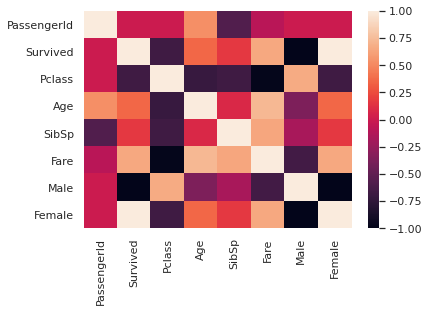

In [44]:
# Observe the correlation beween the numeric variables with heatmap
sns.set()
sns.heatmap(numeric_df.corr())

## From the above correlation between the variables,the findings are as follows:
1. There are significant positive correlation observed between Female and Survived variables. Which gives us an idea that women survival chances were greater in numbers than men. 
2. Conversely, Male has a negative correlation with survived, means chances of male survival was lesser in number than women.
3.  Passengers of Pclass are significantly vulnarable too. There is a significant negative correlation exist between these two variables.
5. The Fare has a significan positive correlation with Survived. Which indicates, passengers with high priced ticket had better chance to survive. This gives an idea that those who all were on low priced deck or cabin had a bigger numbers of casualty.
6. This metrics has given us some idea that which categories of passengers were most likely to be survived and who were not. However, the more we deep dive into the analysis we would be able to unearth more interesting facts.

# Exploratory Data Analysis
###  Survived and Not Suvived

Note: In the following metrics 0 means didn't survive and 1 means survived


In [14]:
# Get the percentage of the survivors
titanic_df.Survived.value_counts([0],[1])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Only 38% passengers survived and
62% passengers did not survived !

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


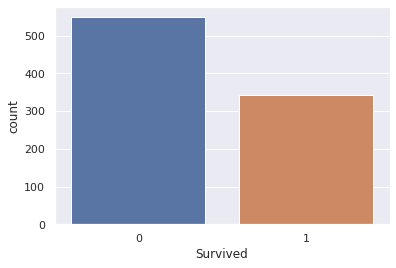

In [15]:
# Visualization of the Survived colum
sns.set()
sns.countplot(titanic_df['Survived'])

# Some Feature engineering on categorical Variables
### Creating New DataFrame with categorical Columns

In [16]:
# Selecting the  categorical object variables
cat_df=titanic_df.select_dtypes(include='object')
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


We can breakdown the name column based on name title

### Feature Engineering on Name Column

In [17]:
# Feature engineering on person's title
# Mr. Ms. Master etc
titanic_df.Name.head(50)
titanic_df['Name_title']=titanic_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
#aggregate the count of passengers with different name titles
titanic_df['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Mme               1
Jonkheer          1
the Countess      1
Capt              1
Sir               1
Lady              1
Ms                1
Name: Name_title, dtype: int64

As shown in the metrics bellow, out of 517 Mr. 81 survived and 436 did not survived, out of 182 Miss 127 survived and 55 did not survived. Out of 125 Mrs 99 survived 26 did not survived out of 40 master 23 survived and 17 did not survived.

In [19]:
# Look for the survival chances with a pivot table
pd.pivot_table(titanic_df,index='Survived', columns='Name_title',values='Name',aggfunc='count')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Survival and non suvival stat of Mr, Miss, Mrs, Master etc are given above

## Male and Female Metrics

In [20]:
# Survival and non-survival count based on sex
print(pd.pivot_table(titanic_df,index='Survived', columns='Sex',values='Ticket',aggfunc='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


Female survival was more than Male survival

## Survival based on Embarking Places

In [21]:
# Survival and non-survival count based on Embarked
print(pd.pivot_table(titanic_df,index='Survived', columns='Embarked',values='Ticket',aggfunc='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


The survival number varies according to passengers embarking places. Passengers embarked from S which stands for Southampton had major casualty than C and Q stands for Cherbourg and Queenstown respectively.

## Suvival based on Passengers Class

In Pclass survival count are shown as per the classes. Here 1 represents First Class, 2 Second and 3 Third Class. As we can see that passengers in 3rd class had more casualties than 2nd and 1st class passengers.


In [22]:
# Casualties based on Passengers Class (Pclass)
print(pd.pivot_table(titanic_df,index='Survived', columns='Pclass',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


## Creating a DataFrame with a new column named "cabin_adv", showing the cabin category.

In the Cabin column we could figure out the cabin name starts with different alphabet and blew shown different count of cabin and survival chance according to alphabetical name. n stands for null. Passengers without cabin fall in this category. The mortality rate is evidently higher in this group. So, from here we deduce that the chances of survival was higher if you were a passengers with cabin name starts with D and E.

Visual representation of the Category based Survived or didn't Survived

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

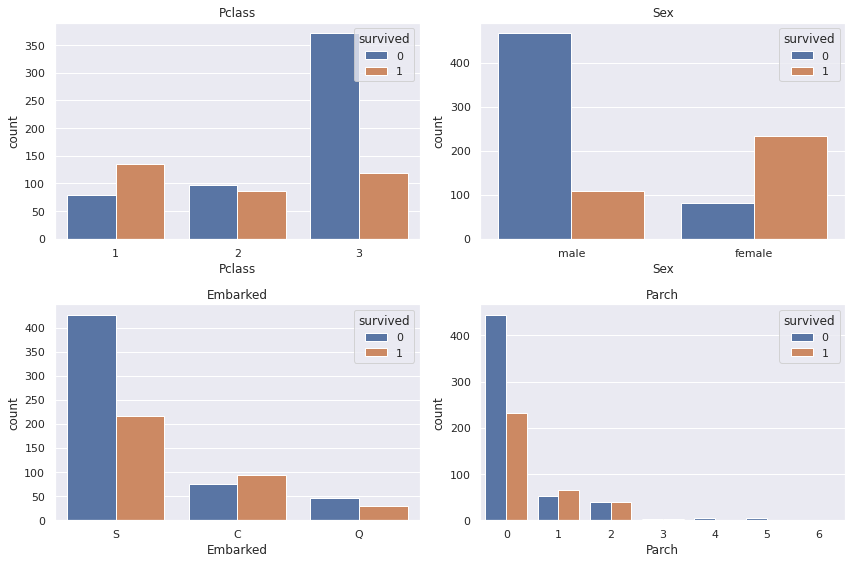

In [23]:
#Visualize the categorical columns to see survived passengers
cols=['Pclass','Sex','Embarked','Parch']
n_rows=2
n_cols=2
# The subplot grid to show the results
fig,axs=plt.subplots(n_rows, n_cols, figsize= (n_cols*6,n_rows*4) )
for r in range(0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols+c # index to go though the number of colums
    ax=axs[r][c]# to show where to position the sub plot
    sns.countplot(titanic_df[cols[i]], hue=titanic_df['Survived'],ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc='upper right')

plt.tight_layout()



### Observing the bar charts above the fact findings are:
1. The First class passengers had better chance to survive than other classes. The mortality rate is shockingly very high in 3rd class passengers.
2. As expected, the mortality rate proved to be higher in all cases about the male passegers than female passengers
3. The passengers embarking point has also significnt role in surviaval chance. As we can see that passengers embarked from s did have least survival chance than other pasengers who embarked from c and d location
4. The family size also has a significal role in surviving. The passengers with family had more survival rate than the passengers without family. 

## Modifying the dataFrame with another column named "Name_title" showing Category of different people

In the name colum the title of the name of passengers are listed as Mr, Ms, Master etc. We may aggregate the passsengers count by thier name title and correlate the groups with  Survived column.

In [24]:
# Creates categories based on the cabin; letter(n stands for null)
# In this case we will traet null values like it's own category
titanic_df['cabin_adv']= titanic_df.Cabin.apply(lambda x: str(x)[0])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young_age_ Gorup,Old_age_group,Male,Female,Name_title,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,Mr,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,Miss,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,Mr,n


In [25]:
print(titanic_df.cabin_adv.value_counts())
pd.pivot_table(titanic_df,index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


## Survival percentage based on gender
 

*   In First class Female survival is 97%, and male survival is 37%.
*   In Second class Female survival is 92%, and male survival is 15%.
*   In Third class Female survival is 50% and male survival is 13%.






In [26]:
#  find out the survival means and sum according to the grouping and sub grouping of class and sex
titanic_df.groupby(['Pclass','Sex'],as_index=False)['Survived'].agg(['mean','sum'])

mean  sum
Pclass Sex                  
1      female  0.968085   91
       male    0.368852   45
2      female  0.921053   70
       male    0.157407   17
3      female  0.500000   72
       male    0.135447   47

### Some interesting fact reaveals from the bellow statistical analysis :

*   Female with parents and children had less suvival ratio than female without parents and children
*  Conversely, male without parent and children had less survival ratio than male with parent and children



In [27]:
titanic_df.groupby(['Parch','Sex'],as_index=False)['Survived'].agg(['mean','sum'])

mean  sum
Parch Sex                  
0     female  0.788660  153
      male    0.165289   80
1     female  0.766667   46
      male    0.327586   19
2     female  0.612245   30
      male    0.322581   10
3     female  0.750000    3
      male    0.000000    0
4     female  0.000000    0
      male    0.000000    0
5     female  0.250000    1
      male    0.000000    0
6     female  0.000000    0

Similar result also observes as in the case of SibSp

In [28]:
titanic_df.groupby(['SibSp','Sex'])['Survived'].agg(['mean','sum'])

mean  sum
SibSp Sex                  
0     female  0.787356  137
      male    0.168203   73
1     female  0.754717   80
      male    0.310680   32
2     female  0.769231   10
      male    0.200000    3
3     female  0.363636    4
      male    0.000000    0
4     female  0.333333    2
      male    0.083333    1
5     female  0.000000    0
      male    0.000000    0
8     female  0.000000    0
      male    0.000000    0

## Visualization

In [ ]:
 g=sns.factorplot(x = "SibSp", y = "Survived", data = titanic_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Performing Two sample T-test on dependent Variables (Survived) with Independent variables i.e. SibSp, Parch, Fare and Age
Hypothesis:

Null Hypothesis: There is no significant difference between the sample independent variables and the dependent variable

Alternative Hypothesis : There is a significant difference between the sample independent variables and the dependent variable

This is to check the dependency metricks of the veriables 


In [47]:
# import the ttest_ind
from scipy.stats import ttest_ind
Ttest_sample_df=titanic_df[['SibSp','Parch', 'Fare','Age']]


## Checking the distribution of data accress the variables

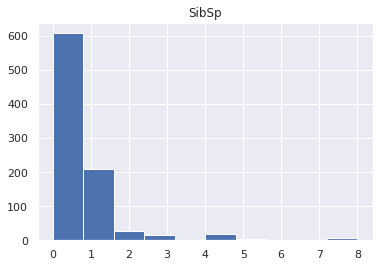

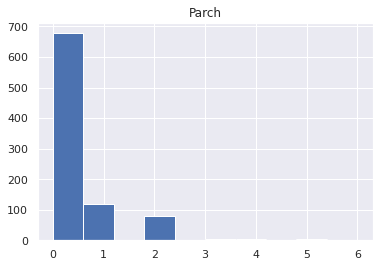

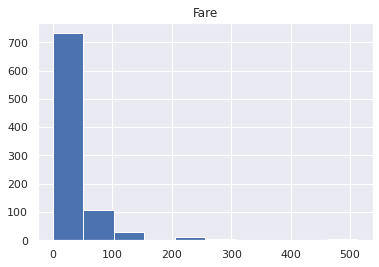

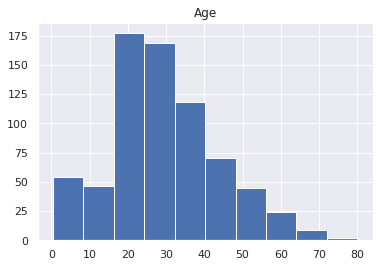

In [31]:
# befor performing two sample test on independent variables let us confirm the distribution
for i in Ttest_sample_df:
  plt.hist(Ttest_sample_df[i])
  plt.title(i)
  plt.show()

Other than age column the data accross the columns are little skewed to the right indicating some outliers at the top. However, we would like to continue our test with this condition since it is some what distributed towards left.

## Twe Sample indipendent T-test

In [41]:
# T-testing with SibSp
ttest,p_value=ttest_ind(Ttest_sample_df['SibSp'],titanic_df['Survived'])

In [42]:
print(ttest,p_value)

3.4464948319348006 0.0005811067141236977


Rejecting the Null hypothesis as the T stat is greater than T critical and the p-value is less than 5%

In [34]:
# T-testing with Parch column
ttest,p_value=ttest_ind(Ttest_sample_df['Parch'],titanic_df['Survived'])

In [35]:
print(ttest,p_value)

-0.07116257604830639 0.9432763600642203


Falied to reject the null hypothesis as T stat is smaller than T ctrtical (0.96) amd P value is greater than 5%

In [36]:
# T-testing with Fare Column
ttest,p_value=ttest_ind(Ttest_sample_df['Fare'],titanic_df['Survived'])

In [37]:
print(ttest,p_value)

19.112798902198033 3.2324176960886792e-74


Reject the null hypothesis as the T stat is greater than T critical and the p-value is less than 5%

In [ ]:
# Creating a dataFrame with only Age column after filling up the NaN values with 0
Age_df=Ttest_sample_df['Age'].fillna(0)


In [39]:
# T-testing with Age column
ttest,p_value=ttest_ind(Age_df,titanic_df['Survived'])

In [40]:
print(ttest,p_value)

39.70632301998179 1.8389156797605152e-247


Reject the null hypothesis as the T stat is greater than T critical and the p-value is less than 5%

The result of independend ttest reveals that there are significant diffence between the dependent and independent variables other than Parch column


# Result of the Analysis


## Facts and figures revealed from the above findings are as follows:



1.   The sample data represents 891 passengers out of 2224 passengers on board in Titanic.

2.   Total 549 out of 891 passengers died according to the sample data. Actual death record is 1502. The acual death percentage is 68%, whereas in our calculation with sample data it is 62%. There is a variance of 6% between actual and sample data death, which is closer to the accuracy.

3.   Let us see the survival percentages according to, gender, age, class/cabin and the category of people i.e. Mr, Miss, Mrs, master etc.

4. Interestingly, as we deep dived into the analysis we could find out that passengers who embarked from different locations, like Cherburg, Queenstown and Southhapton, their suvival chances also differ according to the embarked location. It could be a coincidence or thier might be some root cause which needs more investigation.

## Basing on the analysis let us see the survival pssibilities of different categories of People:

1.  Survival percentages according to gender:

      Male Suvived : 19%

      Female Survived: 74%

2.  Survival percentages according to Passenger class:
                        


                             1st class     2nd class   3rd class
        Male Suvived :        36%           16%        14%

       Female Survived:      96%           92%        50%


3. Survival and non survival state in Cabin passengers:
                               A    B    C    D   E   F   G
             Survived          7    35   35   25  24  8   2 
              Didn't Surv      8    12   24   8   8   5   2 
          % wise survival:    47%  74%  59%  76% 73%  62% 50%

     

4. Survival percentage according to name title :

     a. MR    :    16%    

     b. Mrs   :79%
     
     c. Miss  :  70%      

     d. Master: 58%

5. Survival Percentage based on embarking location:

        Embarking Location Name        Cherbourg     Queenstown     Southampton
        Totla Paassengers               168            77             644
        Survival %                      55%            39%            37%


     

    


  


# Conclusion

The tragic incident of Titanic sinking in the North Atlantic in 1912 still is a reminiscence in our memory as one the tragic ship wrecking incident. Even after more than 100 years people are doing research to find out what actually went wrong in that day which caused such a big disaster? We learn from the history, as such this incident has given us many lessons. Now a days Sea liner has technologically developed, and safety measurea are being given highest priority. Nevertheless, the mith of unsinkable shoun't make us complacent any more to take appropriate misures before an mishap takes place.